# 4

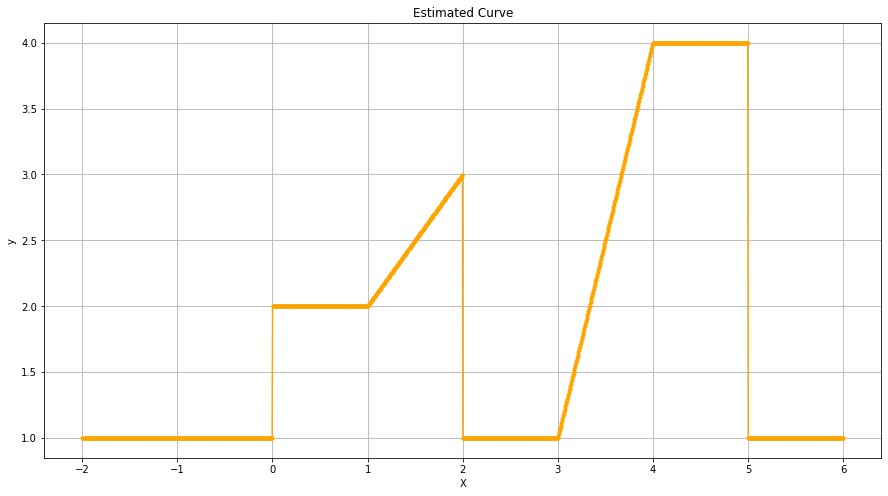

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def curve(X):
    β0=1
    β1=1
    β2=3
    if X<0:
        b1=0
    if X<=1 and X>=0:
        b1=1
    if X>1 and X<=2:
        b1=X
    if X>2:
        b1=0
    if X<=3:
        b2=0
    if X<=4 and X>=3:
        b2=X-3
    if X<=5 and X>4:
        b2=1
    if X>5:
        b2=0
    return β0+β1*b1+β2*b2
    

X = np.linspace(-2,6,1700)

y=[]
for i in X:
    element=curve(i)
    y.append(element)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.plot(X, y, marker=".", color='orange')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Estimated Curve')
plt.grid()
plt.show()

# 7

In [2]:
pip install ISLP;

In [3]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from ISLP.bart import BART

In [4]:
Wage = load_data('Wage')
Wage.head(5)

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [5]:
Wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   object  
 3   race        3000 non-null   object  
 4   education   3000 non-null   category
 5   region      3000 non-null   object  
 6   jobclass    3000 non-null   object  
 7   health      3000 non-null   object  
 8   health_ins  3000 non-null   object  
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 237.6+ KB


In [6]:
Wage.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='age', ylabel='year'>,
        <AxesSubplot:xlabel='logwage', ylabel='year'>,
        <AxesSubplot:xlabel='wage', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='logwage', ylabel='age'>,
        <AxesSubplot:xlabel='wage', ylabel='age'>],
       [<AxesSubplot:xlabel='year', ylabel='logwage'>,
        <AxesSubplot:xlabel='age', ylabel='logwage'>,
        <AxesSubplot:xlabel='logwage', ylabel='logwage'>,
        <AxesSubplot:xlabel='wage', ylabel='logwage'>],
       [<AxesSubplot:xlabel='year', ylabel='wage'>,
        <AxesSubplot:xlabel='age', ylabel='wage'>,
        <AxesSubplot:xlabel='logwage', ylabel='wage'>,
        <AxesSubplot:xlabel='wage', ylabel='wage'>]], dtype=object)

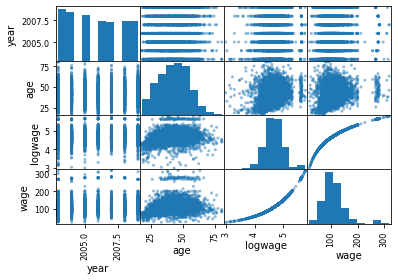

In [7]:
pd.plotting.scatter_matrix(Wage)

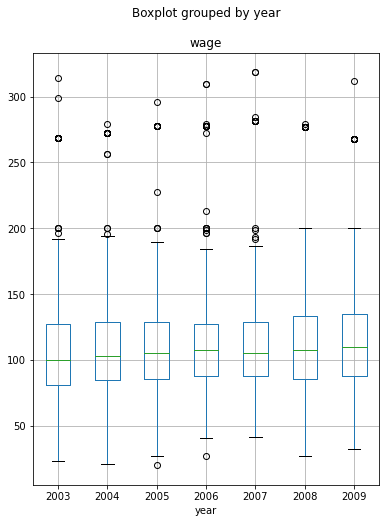

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,8))
Wage.boxplot('wage', by='year', ax=ax);

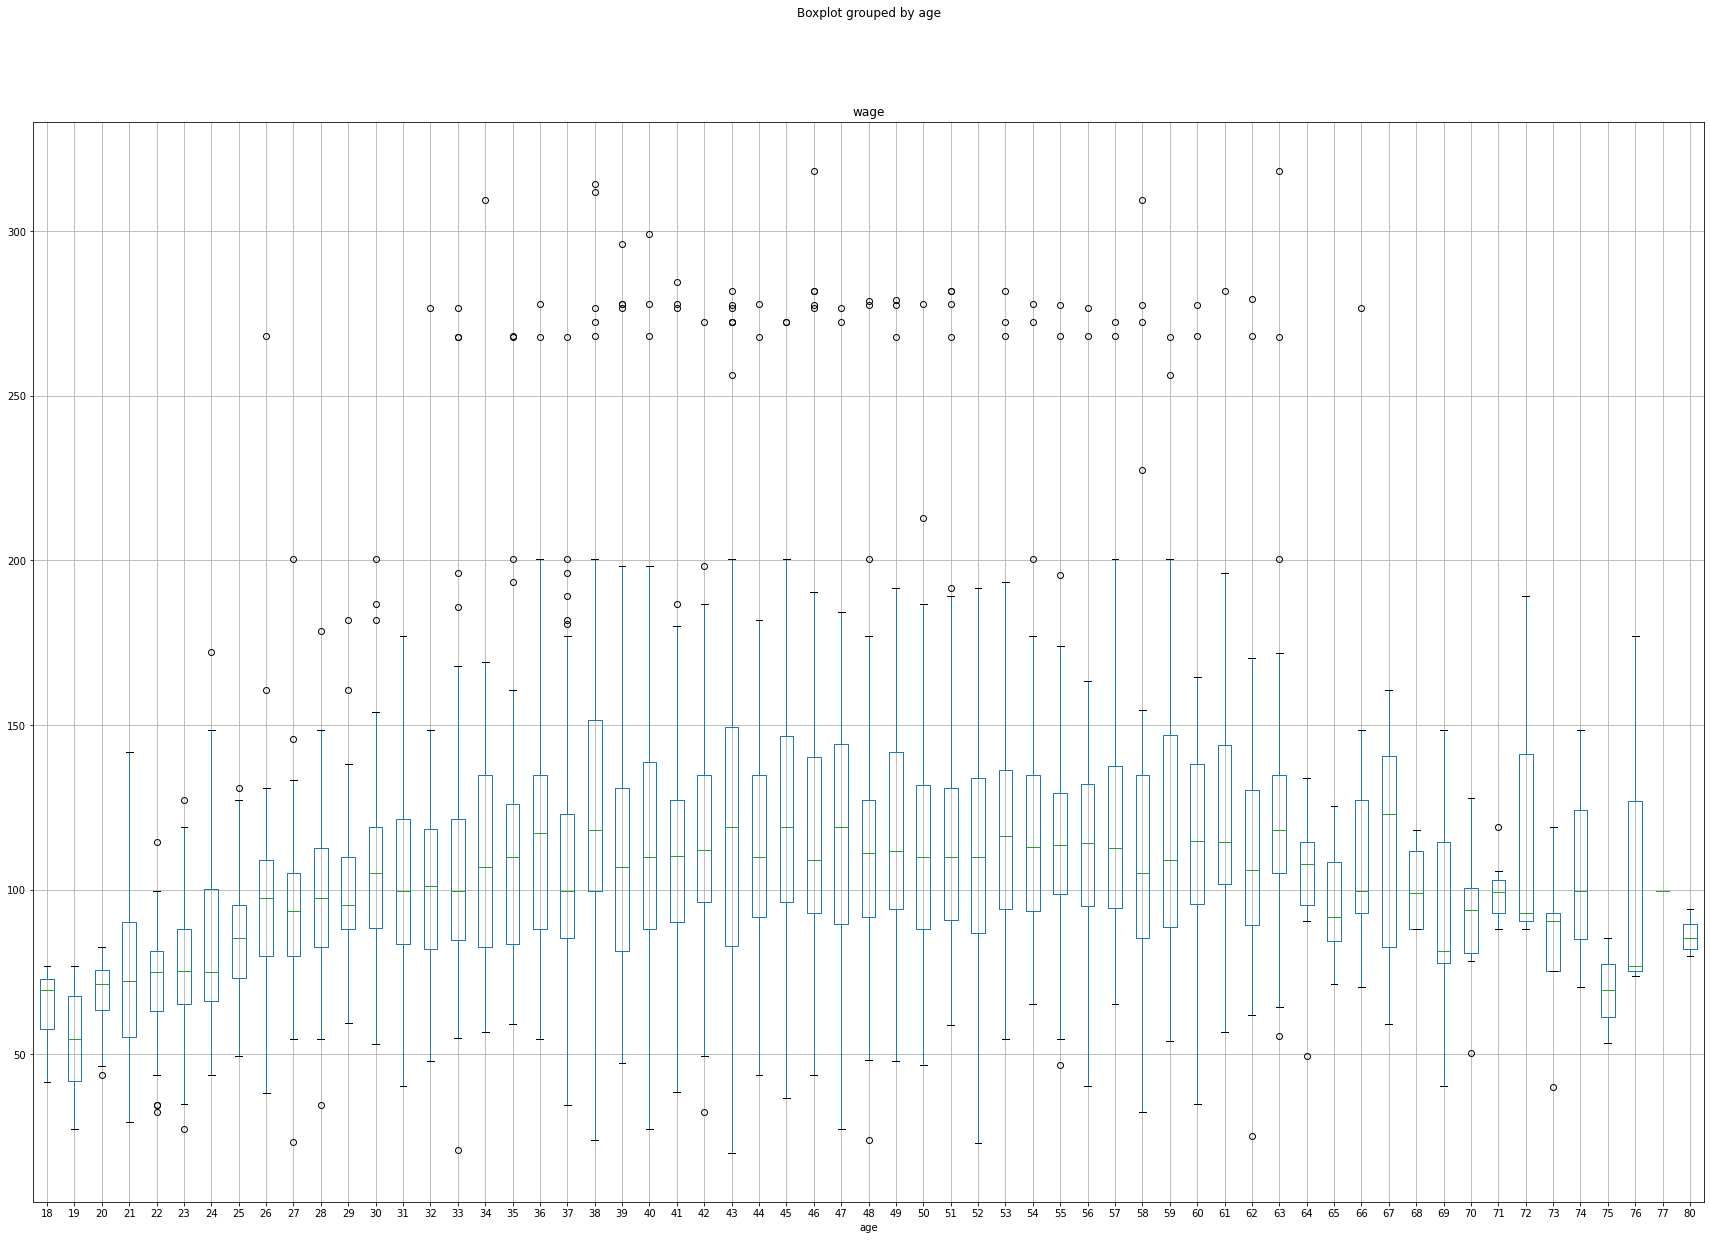

In [9]:
fig, ax = plt.subplots(figsize=(29, 20))
Wage.boxplot('wage', by='age', ax=ax);

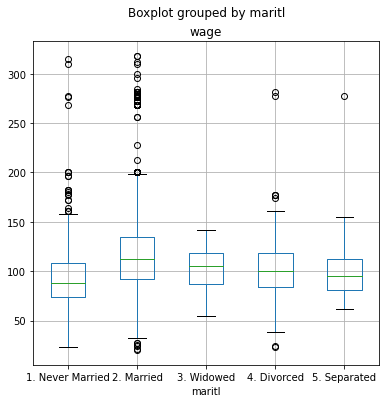

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
Wage.boxplot('wage', by='maritl', ax=ax);

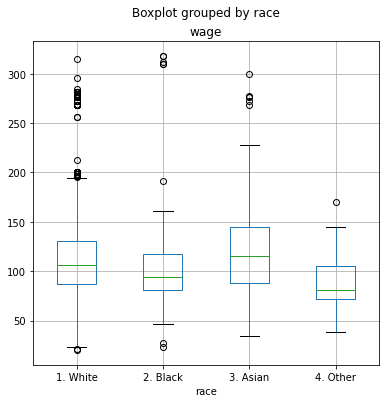

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
Wage.boxplot('wage', by='race', ax=ax);

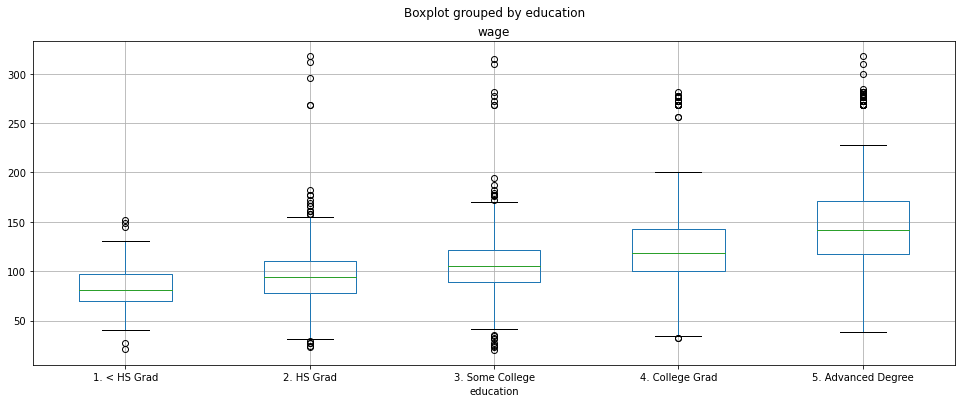

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))
Wage.boxplot('wage', by='education', ax=ax);

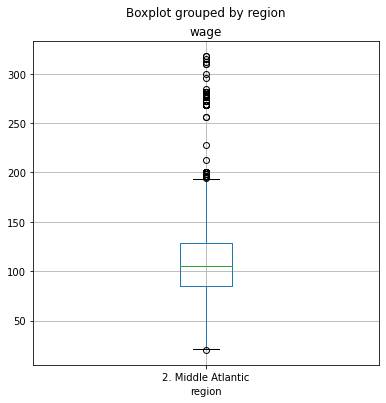

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
Wage.boxplot('wage', by='region', ax=ax);

In [14]:
Wage['region'].unique()

array(['2. Middle Atlantic'], dtype=object)

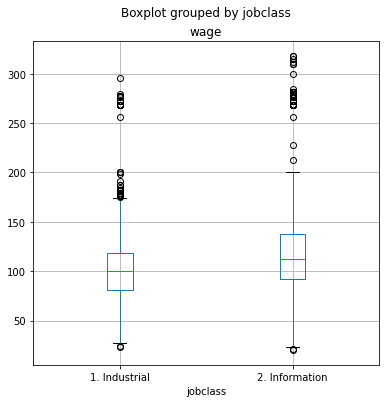

In [15]:
fig, ax = plt.subplots(figsize=(6, 6))
Wage.boxplot('wage', by='jobclass', ax=ax);

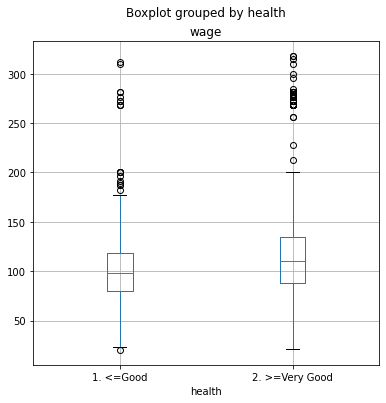

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
Wage.boxplot('wage', by='health', ax=ax);

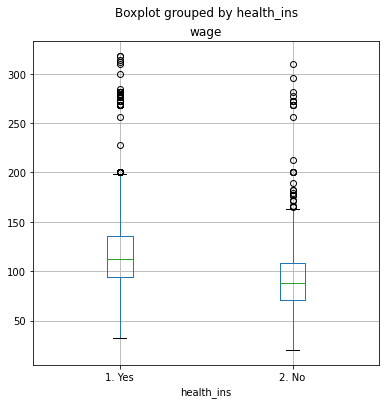

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
Wage.boxplot('wage', by='health_ins', ax=ax);

In [18]:
from pygam import (s as s_gam,
  l as l_gam,
  f as f_gam,
  LinearGAM,
  LogisticGAM)
from ISLP.transforms import (BSpline,
                            NaturalSpline)

from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
  degrees_of_freedom,
  plot as plot_gam,
  anova as anova_gam)
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP.models import (summarize,
                        poly,
                        ModelSpec as MS)
from statsmodels.stats.anova import anova_lm

ns_age = NaturalSpline(df=4).fit(Wage['age'])
ns_year = NaturalSpline(df=5).fit(Wage['year'])
Xs = [ns_age.transform(Wage['age']),
    ns_year.transform(Wage['year']),
    pd.get_dummies(Wage['education']).values]
X_bh = np.hstack(Xs)
gam_bh = sm.OLS(Wage['wage'], X_bh).fit()

In [19]:
age=Wage['age']

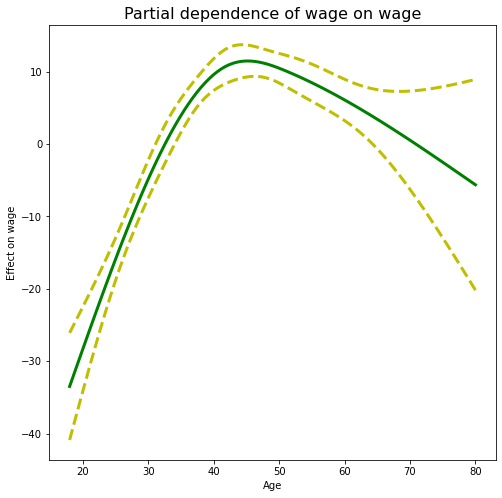

In [20]:
age_grid = np.linspace(age.min(),
                      age.max(),
                      100)
X_age_bh = X_bh.copy()[:100]
X_age_bh[:] = X_bh[:].mean(0)[None,:]
X_age_bh[:,:4] = ns_age.transform(age_grid)
preds = gam_bh.get_prediction(X_age_bh)
bounds_age = preds.conf_int(alpha=0.05)
partial_age = preds.predicted_mean
center = partial_age.mean()
partial_age -= center
bounds_age -= center
fig, ax = subplots(figsize=(8,8))
ax.plot(age_grid, partial_age, 'g', linewidth=3)
ax.plot(age_grid, bounds_age[:,0], 'y--', linewidth=3)
ax.plot(age_grid, bounds_age[:,1], 'y--', linewidth=3)
ax.set_xlabel('Age')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of wage on wage', fontsize=16);

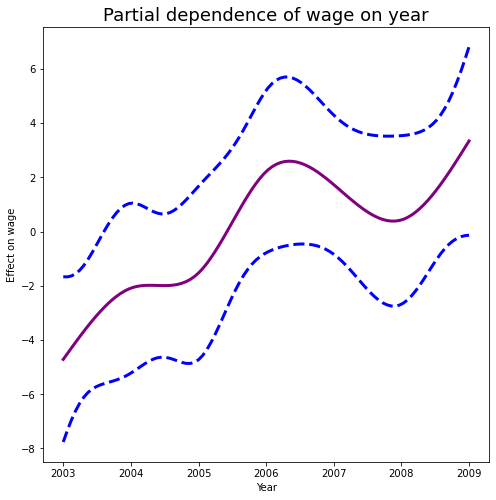

In [21]:
year_grid = np.linspace(2003, 2009, 100)
year_grid = np.linspace(Wage['year'].min(),
                        Wage['year'].max(),
                        100)
X_year_bh = X_bh.copy()[:100]
X_year_bh[:] = X_bh[:].mean(0)[None,:]
X_year_bh[:,4:9] = ns_year.transform(year_grid)
preds = gam_bh.get_prediction(X_year_bh)
bounds_year = preds.conf_int(alpha=0.05)
partial_year = preds.predicted_mean
center = partial_year.mean()
partial_year -= center
bounds_year -= center
fig, ax = subplots(figsize=(8,8))
ax.plot(year_grid, partial_year , 'purple', linewidth=3)
ax.plot(year_grid, bounds_year[:,0], 'b--', linewidth=3)
ax.plot(year_grid, bounds_year[:,1], 'b--', linewidth=3)
ax.set_xlabel('Year')
ax.set_ylabel('Effect on wage')
ax.set_title('Partial dependence of wage on year', fontsize=18);

In [22]:
gam_bh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     94.86
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          8.30e-213
Time:                        02:29:44   Log-Likelihood:                -14931.
No. Observations:                3000   AIC:                         2.989e+04
Df Residuals:                    2986   BIC:                         2.997e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            46.4460      3.732     12.446      0.000      39.129      53.763
x2            28.9349      3.884      7.449      0.000      21.319      36.551
x3            63.6722      9.231      6.898      0.000      45.572      81.772
x4            10.9669      7.650      1.434      0.152      -4.034      25.967
x5             1.8374      3.177      0.578      0.563      -4.392       8.067
x6            10.4409      3.790      2.755      0.006       3.010      17.872
x7             2.0020      3.399      0.589      0.556      -4.663       8.667
x8             9.6055      4.053      2.370      0.018       1.659      17.552
x9             5.8989      2.419      2.438      0.015       1.155      10.642
x10           43.8013      4.383      9.993      0.000      35.207      52.396
x11           54.7329      4.037     13.558      0.000      46.817      62.649
x12           67.1982      4.159     16.156      0.000      59.043      75.354
x13           81.9664      4.231     19.371      0.000      73.670      90.263
x14          106.3711      4.456     23.872      0.000      97.634     115.108
==============================================================================
Omnibus:                     1040.093   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5576.947
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                       8.910   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model1=gam_bh
model1

In [24]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree=5)
Xage = poly.fit_transform(Wage[['age']])
model2 = sm.OLS(Wage[['wage']], Xage)
model2 = model2.fit()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     56.71
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.67e-56
Time:                        02:29:44   Log-Likelihood:                -15314.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2994   BIC:                         3.068e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.7046    161.435     -0.308      0.758    -366.239     266.830
x1             3.9930     20.110      0.199      0.843     -35.438      43.424
x2             0.2760      0.958      0.288      0.773      -1.603       2.155
x3            -0.0126      0.022     -0.577      0.564      -0.056       0.030
x4             0.0002      0.000      0.762      0.446      -0.000       0.001
x5         -9.157e-07   1.02e-06     -0.897      0.370   -2.92e-06    1.09e-06
==============================================================================
Omnibus:                     1094.840   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4940.229
Skew:                           1.718   Prob(JB):                         0.00
Kurtosis:                       8.265   Cond. No.                     9.39e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
poly = preprocessing.PolynomialFeatures(degree=2)
Xaged2 = poly.fit_transform(Wage[['age']])
model3 = sm.OLS(Wage[['wage']], Xaged2)
model3 = model3.fit()

In [27]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     134.0
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.82e-56
Time:                        02:29:44   Log-Likelihood:                -15321.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2997   BIC:                         3.067e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4252      8.190     -1.273      0.203     -26.483       5.633
x1             5.2940      0.389     13.620      0.000       4.532       6.056
x2            -0.0530      0.004    -11.960      0.000      -0.062      -0.044
==============================================================================
Omnibus:                     1092.673   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4915.802
Skew:                           1.715   Prob(JB):                         0.00
Kurtosis:                       8.250   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
sm.stats.anova_lm(model1, model2, model3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2986.0,3.695815e+06,0.0,NaN,NaN,NaN
1,2994.0,4.770322e+06,-8.0,-1.074507e+06,83.976841,NaN
2,2997.0,4.793430e+06,-3.0,-2.310841e+04,4.816029,NaN


# 10

# (a)

In [29]:
np.random.seed(22)

#Creating labels with 20 rows and 50 attributes using distributions in np.random and merging them
predictors1 = np.random.normal(2, 6, (20, 50))
label1_value=np.full((20, 1), 2)
predictors2 = np.random.uniform(-4, 4, (20, 50))
label2_value=np.full((20, 1), 3.6)
predictors3 = np.random.logistic(5,1.5, (20, 50))
label3_value=np.full((20, 1), 6.6)

dflabel1=np.append(predictors1,label1_value,axis=1)
dflabel2=np.append(predictors2,label2_value,axis=1)
dflabel3=np.append(predictors3,label3_value,axis=1)

df = pd.DataFrame(np.vstack((dflabel1,dflabel2,dflabel3)))

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.448300,-6.780104,8.490750,0.564049,-0.946775,-4.013632,7.512929,-4.621793,5.758961,-1.369083,...,-1.833448,-4.647021,14.636875,-1.404327,-0.879699,-9.539379,4.397531,-4.289103,-2.163272,2.0
1,6.472035,5.221460,-2.396331,5.334294,4.593736,1.185176,-3.646637,4.908604,-7.196929,4.429873,...,-14.617198,-0.953066,2.414889,-0.100015,7.216071,0.699415,2.102711,6.138280,-3.298859,2.0
2,10.983488,-1.879267,5.626947,3.289701,-0.541604,2.626515,3.869432,-0.802379,15.203294,-4.082427,...,-5.592429,5.105888,6.689630,10.330303,-0.836416,11.528634,-4.519568,4.159636,0.024193,2.0
3,1.194186,9.536745,6.180521,20.452382,2.533078,-1.490061,10.112483,4.533632,0.332491,10.921192,...,-6.323294,5.336784,-7.627465,6.393271,8.124604,4.900467,10.654726,4.096059,-2.690518,2.0
4,0.115750,9.526357,-10.684383,4.053957,-5.453920,16.285404,-7.188348,-12.084062,7.538281,7.080706,...,7.843979,4.784937,-5.388304,-6.826066,3.926953,-6.309987,-5.401118,0.958502,-0.440080,2.0


# (b)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#Excluding label column
principalComponents = pca.fit_transform(df.iloc[:,0:50])
df_pca = pd.DataFrame(principalComponents, columns=['first principal component', 'second principal component'])
df_pca['labels'] = df[[50]]
df_pca.head()


,first principal component,second principal component,labels
0,6.538021,4.756910,2.0
1,2.294983,18.621326,2.0
2,-3.003483,-9.952631,2.0
3,-16.987435,20.727595,2.0
4,4.532156,16.087117,2.0


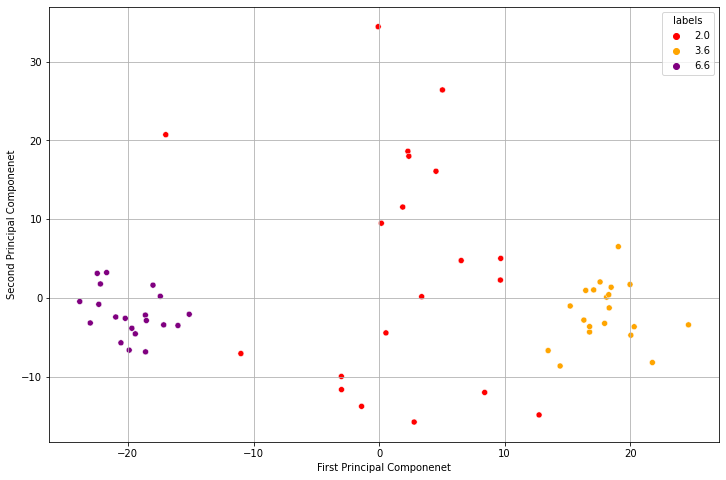

In [32]:
import seaborn as sns

fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x="first principal component", y="second principal component", hue="labels", palette={2:'red', 3.6:'orange', 6.6:'purple'}, data=df_pca)
plt.grid()
plt.xlabel("First Principal Componenet")
plt.ylabel("Second Principal Componenet")
plt.show()

# (c)

In [33]:
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=3, random_state=7,n_init=20).fit(df.iloc[:,0:50])
print(kmeans3.labels_)

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [34]:
print(kmeans3)

KMeans(n_clusters=3, n_init=20, random_state=7)


In [35]:
print(kmeans3.inertia_)

49518.50682749842


In [36]:
pd.crosstab(pd.Series(df[50]),
            pd.Series(kmeans3.labels_, name='K-means'))

K-means,0,1,2
50,,,
2.0,14,2,4
3.6,20,0,0
6.6,0,0,20


# (d)

In [37]:
kmeans2 = KMeans(n_clusters=2, random_state=7,n_init=20).fit(df.iloc[:,0:50])
print(kmeans2.labels_)

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
print(kmeans2)

KMeans(n_clusters=2, n_init=20, random_state=7)


In [39]:
print(kmeans2.inertia_)

52432.9608525129


In [40]:
pd.crosstab(pd.Series(df[50]),
            pd.Series(kmeans2.labels_, name='K-means'))

K-means,0,1
50,,
2.0,4,16
3.6,0,20
6.6,20,0


# (e)

In [41]:
kmeans4 = KMeans(n_clusters=4, random_state=7,n_init=20).fit(df.iloc[:,0:50])
print(kmeans4.labels_)

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 3 1 0 3 0 1 2 3 0 3 2 3 0 0 1 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [42]:
print(kmeans4)

KMeans(n_clusters=4, n_init=20, random_state=7)


In [43]:
print(kmeans4.inertia_)

45500.79092808049


In [44]:
pd.crosstab(pd.Series(df[50]),
            pd.Series(kmeans4.labels_, name='K-means'))

K-means,0,1,2,3
50,,,,
2.0,10,3,2,5
3.6,0,0,0,20
6.6,0,20,0,0


# (f)

In [45]:
df_pca[['first principal component', 'second principal component']]

,first principal component,second principal component
0,6.538021,4.756910
1,2.294983,18.621326
2,-3.003483,-9.952631
3,-16.987435,20.727595
4,4.532156,16.087117
5,1.881930,11.545489
6,2.370799,17.995765
7,-11.005126,-7.045617
8,0.545708,-4.425503
9,2.793559,-15.738239


In [46]:
kmeanspca = KMeans(n_clusters=3, random_state=0).fit(df_pca[['first principal component', 'second principal component']])
print(kmeanspca.labels_)

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 2 0 2 2 2 2 0 1 1 1 1 0 1 1 2 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [47]:
pd.crosstab(pd.Series(df[50]),
            pd.Series(kmeanspca.labels_, name='K-means'))

K-means,0,1,2
50,,,
2.0,4,8,8
3.6,0,20,0
6.6,20,0,0


In [48]:
kmeanspca.inertia_

3981.5355595696533

# (g)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=True,
                        with_mean=True)
df_scaled = scaler.fit_transform(df)

In [50]:
type(df_scaled)

numpy.ndarray

In [51]:
df_scaled = pd.DataFrame(data=df_scaled) 

In [52]:
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.225492,-2.180885,1.361168,-0.427359,-0.852374,-1.834303,1.246368,-1.215301,0.697963,-0.962599,...,-0.776379,-1.472241,2.563597,-0.928019,-0.868274,-2.332115,0.655238,-1.333658,-0.997996,-1.083890
1,1.077849,0.631822,-0.945341,0.447935,0.400328,-0.436564,-1.268286,0.431024,-1.954319,0.114778,...,-3.349256,-0.709893,0.060119,-0.628465,0.962761,-0.264541,0.113042,1.032119,-1.282845,-1.083890
2,2.248285,-1.032317,0.754450,0.072772,-0.760765,-0.049049,0.425356,-0.555518,2.631372,-1.466707,...,-1.532917,0.540535,0.935731,1.767010,-0.858484,1.922261,-1.451603,0.583202,-0.449294,-1.083890
3,-0.291418,1.643160,0.871729,3.221959,-0.065584,-1.155822,1.832141,0.366250,-0.412924,1.320788,...,-1.680012,0.588187,-1.996896,0.862813,1.168246,0.583800,2.133625,0.568778,-1.130250,-1.083890
4,-0.571204,1.640725,-2.701226,0.213005,-1.871433,3.623248,-2.066361,-2.504368,1.062219,0.607271,...,1.171315,0.474298,-1.538240,-2.173201,0.218856,-1.679987,-1.659887,-0.143075,-0.565752,-1.083890
5,0.693508,2.930594,-1.556165,1.646545,-1.993173,0.029943,1.638255,2.608093,-2.091529,1.752553,...,-1.218445,2.008732,0.402158,-0.362117,0.852549,1.780002,0.160417,-3.496751,-1.834148,-1.083890
6,-0.166251,0.100939,1.877907,0.447423,-0.540334,1.218081,-0.836858,1.013218,-2.018114,1.500353,...,0.563971,-0.361757,0.077909,-2.421169,2.659608,0.987158,-1.118792,-0.607455,1.034113,-1.083890
7,-1.048000,-1.225118,1.207758,-0.207837,0.503143,1.481727,-0.996432,1.694214,1.239980,-1.404015,...,-0.211902,0.654142,0.986086,0.777583,2.153015,0.423911,1.020241,-0.107037,-2.031741,-1.083890
8,-0.771508,0.232033,-3.180201,0.320157,0.509853,1.785090,0.673831,1.201510,0.049610,-0.722853,...,0.433902,0.366249,1.961430,-0.592122,-0.376045,-2.582650,-0.117049,-2.327416,-1.118183,-1.083890
9,0.041635,-0.990986,-0.170057,-2.676600,-0.759878,0.063013,0.018765,0.360340,-0.950845,0.428804,...,0.863113,0.756514,0.536495,1.351868,-0.443050,-0.461058,0.071318,-0.246726,0.700471,-1.083890


In [53]:
type(df_scaled)

pandas.core.frame.DataFrame

In [54]:
kmeans_scaled = KMeans(n_clusters=3, random_state=7,n_init=20).fit(df_scaled.iloc[:,0:50])
print(kmeans_scaled.labels_)

C:\Users\ishaj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 2 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [55]:
kmeans_scaled.inertia_

2236.167837836526

In [56]:
pd.crosstab(pd.Series(df[50]),
            pd.Series(kmeans_scaled.labels_, name='K-means'))

K-means,0,1,2
50,,,
2.0,15,2,3
3.6,20,0,0
6.6,0,0,20
